<a href="https://colab.research.google.com/github/karahokenstad/heat_flow_apparatus/blob/main/heat_flow_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!pip install whit-phys-util

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
import scipy.constants as const
import seaborn as sns

In [78]:
repo = buc.local_repository("https://github.com/karahokenstad/heat_flow_apparatus")

Repository exists at this location. Pulling changes from GitHub.
git pull
Your configuration specifies to merge with the ref 'refs/heads/master'
from the remote, but no such ref was fetched.
Command: < git pull > failed. Check your permissions.


In [79]:
model = np.zeros([10,10])
model

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [80]:
#F0M = k*dt/(cp*rho*dx**2)    actual eqn, must be < 0.25
F0M = 0.1

# Boundary Conditions

In [81]:
model[:,:] = 10
model[:,0] = 30
model[:,9] = 0
model

array([[30., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [30., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [30., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [30., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [30., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [30., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [30., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [30., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [30., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [30., 10., 10., 10., 10., 10., 10., 10., 10.,  0.]])

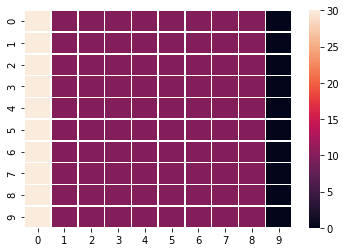

In [82]:
ax = sns.heatmap(model, linewidth=0.5)
plt.show()

# Solving

In [85]:
model_next = model
dim = 10; # dimension of array
for i in range(dim):
  for j in range(dim):
    if i == 0:
      if j == 0:
        model_next[i,j] = (1-4*F0M)*model[i,j] + F0M*(model[i+1,j] + model[i,j+1] + model[i,j] + model[i,j])
      if j == (dim-1):
        model_next[i,j] = (1-4*F0M)*model[i,j] + F0M*(model[i+1,j] + model[i,j] + model[i,j] + model[i,j-1])
      else:
        model_next[i,j] = (1-4*F0M)*model[i,j] + F0M*(model[i+1,j] + model[i,j+1] + model[i,j] + model[i,j-1])
    elif i == (dim-1):
      if j == 0:
        model_next[i,j] = (1-4*F0M)*model[i,j] + F0M*(model[i,j] + model[i,j+1] + model[i-1,j] + model[i,j])
      if j == (dim-1):
        model_next[i,j] = (1-4*F0M)*model[i,j] + F0M*(model[i,j] + model[i,j] + model[i-1,j] + model[i,j-1])
      else:
        model_next[i,j] = (1-4*F0M)*model[i,j] + F0M*(model[i,j] + model[i,j+1] + model[i-1,j] + model[i,j-1])
    else:
      if j == 0:
        model_next[i,j] = (1-4*F0M)*model[i,j] + F0M*(model[i+1,j] + model[i,j+1] + model[i-1,j] + model[i,j])
      if j == (dim-1):
        model_next[i,j] = (1-4*F0M)*model[i,j] + F0M*(model[i+1,j] + model[i,j] + model[i-1,j] + model[i,j-1])
      else:
        model_next[i,j] = (1-4*F0M)*model[i,j] + F0M*(model[i+1,j] + model[i,j+1] + model[i-1,j] + model[i,j-1])
model_next

array([[19.10912   , 12.017872  , 10.3138432 , 10.04272592, 10.00542035,
        10.00065817, 10.00007757,  9.90000895,  8.27000101,  1.64500011],
       [18.1706208 , 12.02308288, 10.34396157, 10.0506938 , 10.0069151 ,
        10.00089795, 10.00011265,  9.88001378,  8.14200165,  1.7634002 ],
       [17.96116119, 11.99778578, 10.34513777, 10.05188197, 10.00723996,
        10.00096388, 10.00012417,  9.87701561,  8.12350192,  1.77835024],
       [17.91784529, 11.98910893, 10.34427555, 10.05193072, 10.00728459,
        10.00097661, 10.00012691,  9.87661612,  8.12106201,  1.78002625],
       [17.90931553, 11.98699254, 10.34392691, 10.05189727, 10.00728609,
        10.00097824, 10.00012739,  9.87656623,  8.12075703,  1.78019875],
       [17.90769187, 11.98654453, 10.34383476, 10.05188312, 10.0072847 ,
        10.00097827, 10.00012745,  9.87656024,  8.12072024,  1.78021516],
       [17.90739036, 11.98645665, 10.34381422, 10.05187923, 10.00728412,
        10.00097821, 10.00012745,  9.87655955

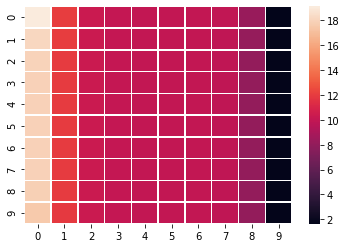

In [86]:
ax = sns.heatmap(model_next, linewidth=0.5)
plt.show()